In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## data cleaning


In [6]:
# dropping unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming columns for clarity
df = df.rename(columns={'v1': 'labels', 'v2': 'text'})

In [9]:
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["labels"] = df["labels"].map({'ham': 0, 'spam': 1})

In [11]:
df.head()

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isna().sum()

labels    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

## EDA


In [17]:
df['labels'].value_counts()

labels
0    4516
1     653
Name: count, dtype: int64

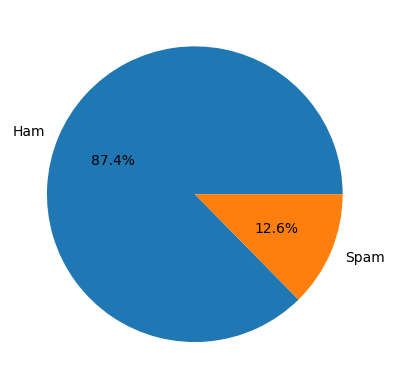

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%')
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# total number of characters in each text message
df["number_of_char"] = df['text'].apply(len)

In [21]:
df.head()

,labels,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# total number of words in each text message
df["number_of_words"] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,labels,text,number_of_char,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# total number of sentences in each text message
df["number_of_sentences"] = df['text'].apply(
    lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,labels,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,labels,number_of_char,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
# for ham messages
df_ham = df[df['labels'] == 0]
df_ham.describe()

,labels,number_of_char,number_of_words,number_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
# for spam messages
df_spam = df[df['labels'] == 1]
df_spam.describe()

,labels,number_of_char,number_of_words,number_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


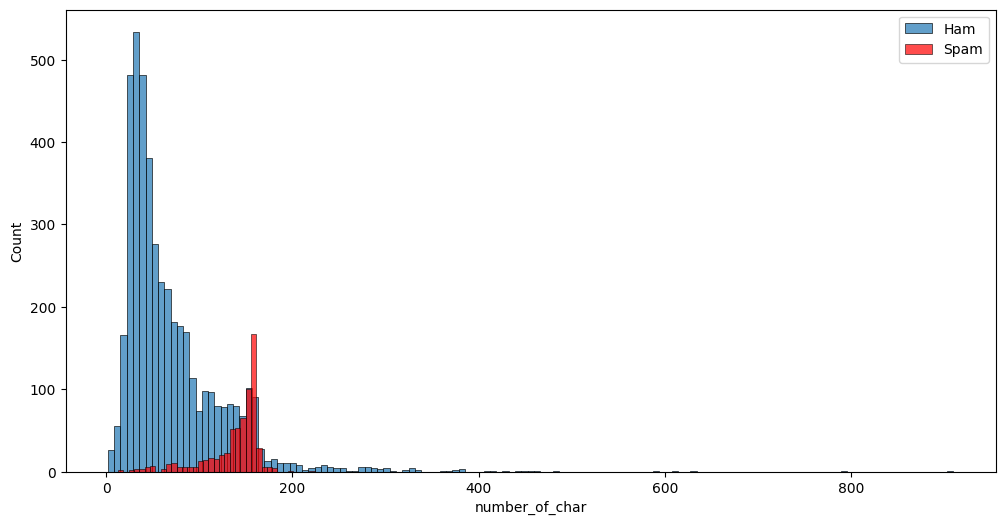

In [29]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ham, x="number_of_char", alpha=0.7, label='Ham')
sns.histplot(data=df_spam, x="number_of_char",
             color='red', alpha=0.7, label='Spam')
plt.legend()
plt.show()

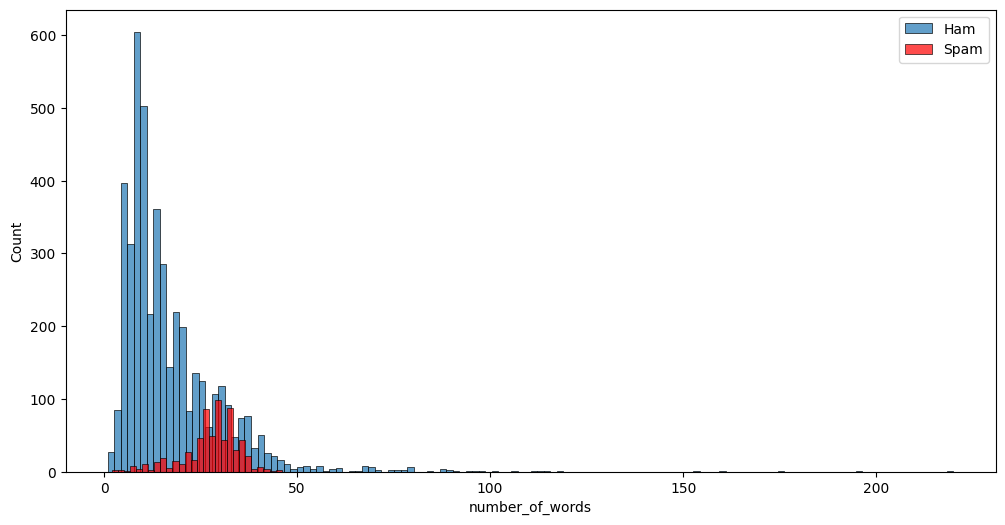

In [30]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ham, x="number_of_words", alpha=0.7, label='Ham')
sns.histplot(data=df_spam, x="number_of_words",
             color='red', alpha=0.7, label='Spam')
plt.legend()
plt.show()

In [31]:
# correlation
correlation = df.corr(numeric_only=True)["labels"].sort_values(ascending=False)
correlation

labels                 1.000000
number_of_char         0.384717
number_of_sentences    0.263939
number_of_words        0.262912
Name: labels, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

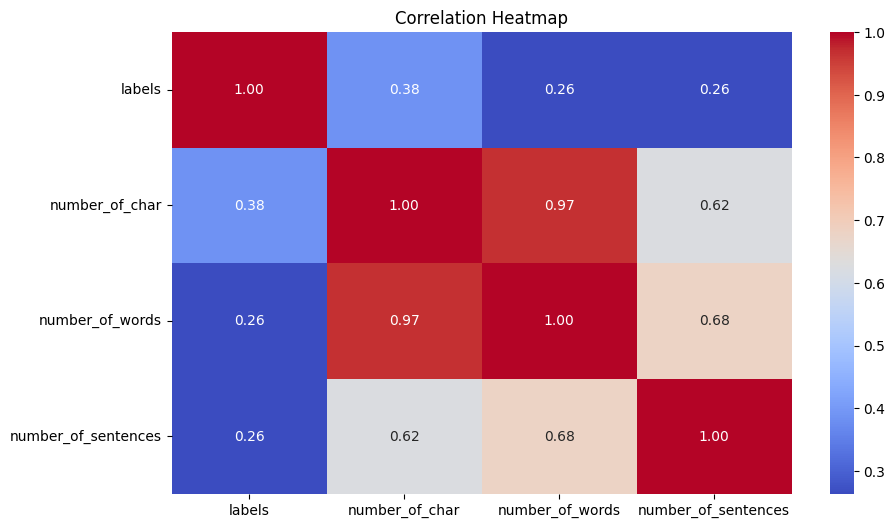

In [32]:
# heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

## data preproccesing

- lower case
- tokenization
- removing special characters
- removing stopwords and punctuations
- stemming


In [33]:
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

string.punctuation

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def text_preprocessing(text):
    # lower case
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # removing special characters/ emojis
    new_text = []

    for i in text:
        if i.isalnum():
            new_text.append(i)

    text = new_text[:]
    new_text.clear()

    # removing stopwords and punctuations
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            new_text.append(i)

    # stemming
    text = new_text[:]
    new_text.clear()

    for i in text:
        new_text.append(ps.stem(i))

    return " ".join(new_text)

In [35]:
a = "hello world! this is 😎❤️😂 a text 20%$ message??, i am loving this ml course"

In [36]:
text_preprocessing(a)

'hello world text 20 messag love ml cours'

In [37]:
df["transformed_text"] = df['text'].apply(text_preprocessing)

In [38]:
df.head()

,labels,text,number_of_char,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,
               background_color='white')

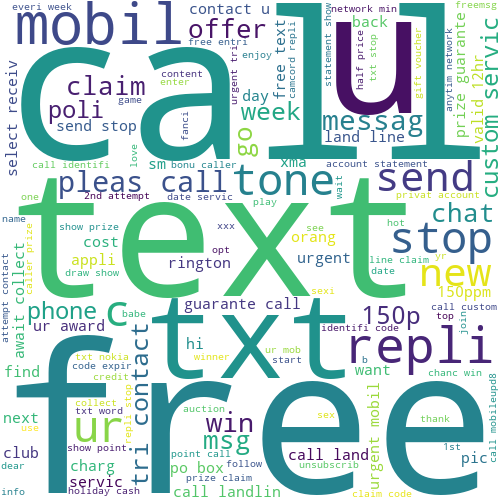

In [40]:
# world cloud of spam messages
spam_wc = wc.generate(df[df['labels'] == 1]
                      ['transformed_text'].str.cat(sep=" "))
spam_wc.to_image()

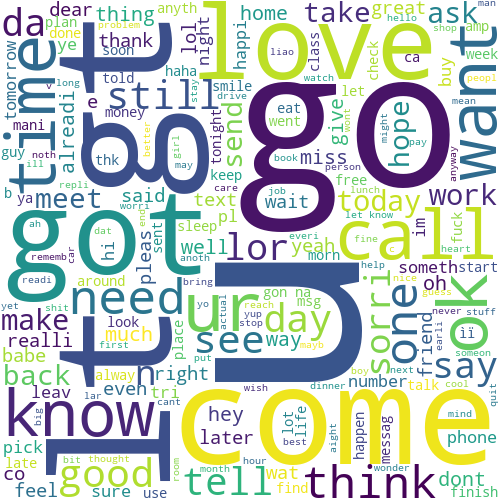

In [41]:
# world cloud of ham messages
spam_wc = wc.generate(df[df['labels'] == 0]
                      ['transformed_text'].str.cat(sep=" "))
spam_wc.to_image()

In [42]:
# top 30 most frequent words in spam messages
spam_corpus = []

for msg in df[df['labels'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

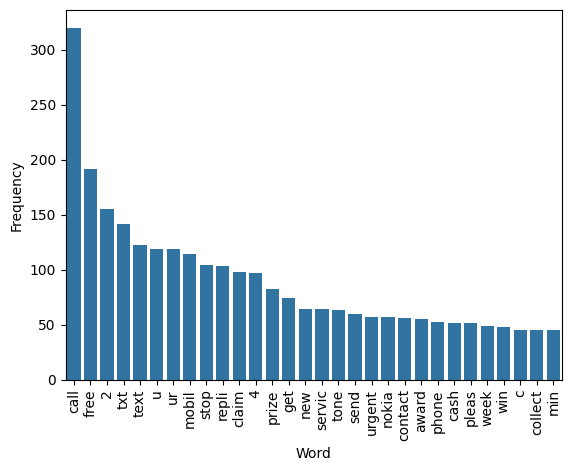

In [43]:
from collections import Counter
spam_collection = Counter(spam_corpus).most_common(30)

spam_df = pd.DataFrame(spam_collection, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation=90)
plt.show()

In [44]:
# top 30 most frequent words in ham messages
ham_corpus = []

for msg in df[df['labels'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

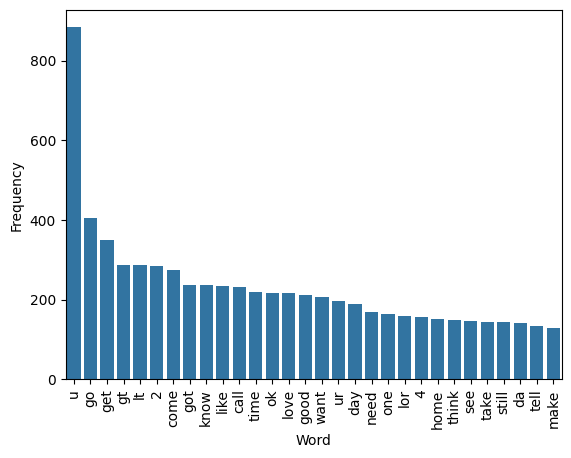

In [45]:
from collections import Counter
ham_collection = Counter(ham_corpus).most_common(30)

ham_df = pd.DataFrame(ham_collection, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=ham_df)
plt.xticks(rotation=90)
plt.show()

## Model building using naive bayes classifier

- because on textual data naive bayes is the best model


In [46]:
# vectorization using CountVectorizer and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [47]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [49]:
y = df['labels'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [50]:
# train-test split on the basis of labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['labels'])

In [51]:
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

gnb = GaussianNB()  
mnb = MultinomialNB()  # alpha is a smoothing parameter
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [53]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

In [54]:
# accuracy scores

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred2))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred3))

MultinomialNB Accuracy: 0.965183752417795
BernoulliNB Accuracy: 0.9777562862669246


In [55]:
# precision scores

print("MultinomialNB Precision:", precision_score(y_test, y_pred2))
print("BernoulliNB Precision:", precision_score(y_test, y_pred3))

MultinomialNB Precision: 1.0
BernoulliNB Precision: 0.9821428571428571


In [56]:
df["labels"].value_counts()

labels
0    4516
1     653
Name: count, dtype: int64

### here data is imbalanced, so precision is more important than accuracy

### hence we choose MultinomialNB as it has the highest precision score


In [57]:
# saving the model and vectorizer
import joblib
joblib.dump(mnb, 'spam_detector_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']